In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import chart_studio.plotly as py
import plotly.graph_objs as go
from lxml import etree
from unicodedata import normalize

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [176]:
df = pd.read_csv('dataset.csv')

In [177]:
state_name = pd.read_excel('state_and_abv.xlsx')

In [178]:
df2 = pd.merge(df,state_name,how='inner',on='state')

In [179]:
groupeddf = (df2.groupby(['state', 'ABV']).agg({'killed':'sum', 'injured': 'sum', 'victims': 'sum'})).reset_index()

In [180]:
groupeddf['killed'] = groupeddf['killed'].astype(float)
groupeddf['injured'] = groupeddf['injured'].astype(float)
groupeddf['victims'] = groupeddf['victims'].astype(float)

In [206]:
groupeddf.head(20)

,state,ABV,killed,injured,victims
0,Alabama,AL,3.0,6.0,9.0
1,Alaska,AK,0.0,1.0,1.0
2,Arizona,AZ,1.0,0.0,1.0
3,Arkansas,AR,0.0,3.0,3.0
4,California,CA,7.0,22.0,29.0
5,Colorado,CO,1.0,3.0,4.0
6,Connecticut,CT,26.0,2.0,28.0
7,Delaware,DE,0.0,1.0,1.0
8,Florida,FL,22.0,29.0,51.0
9,Georgia,GA,2.0,8.0,10.0


In [217]:
barchart_data = groupeddf.copy()
barchart_data = barchart_data.sort_values('victims', ascending=True)

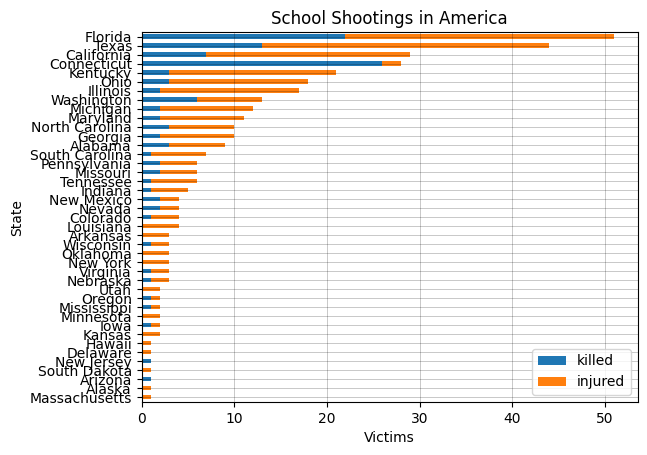

In [229]:
ax = barchart_data[["state", "killed", "injured"]].plot.barh(x="state", stacked=True)
plt.title("School Shootings in America")
plt.xlabel("Victims")
plt.ylabel("State")

ax.grid(visible=True,
            color='black',
            linestyle='-',
            linewidth=0.5,
            alpha=0.3,
        zorder=1
           )

In [182]:
data = dict(type='choropleth',
           colorscale = 'reds',
            reversescale = False,
           locations = groupeddf['ABV'],
           locationmode = 'USA-states',
           z = groupeddf['killed'],
           text = groupeddf['state'],
           marker = dict(line = dict(color = 'rgb(12,12,12)', width=1)),
           colorbar= {'title': 'Killed'},
           )

In [183]:
layout = dict(title = 'School Shootings in America',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

In [184]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)